<font size="5">Exercício - Tratar dados de "tempo.csv"</font>

<font size="4">Aparência: sol, nublado, chuva</font>

<font size="4">Temperatura: -130 ~ 130 F</font>

<font size="4">Umidade: 0 ~ 100</font>

<font size="4">Jogar: sim/não</font>

<font size="4">Tratar valores NaN</font>

In [3]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [4]:
#Importando dados

dataset = pd.read_csv("../data/tempo.csv", sep =";")

In [5]:
#Visualizando tamanho da tabela

dataset.shape

(14, 5)

In [6]:
#Visualizando tabela inteira

dataset

#Conclusão:
#Dados fora do domínio: Aparencia, Temperatura, Umidade
#Dados NaN: Umidade, Vento

#Porém, será feita uma análise específica para cada coluna.

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


<font size="4">Explorando dados categóricos</font>

In [8]:
#Procurando por dados NaN em todo dataset

dataset.isnull().sum()

#Conclusão: Há valores NaN nas colunas Umidade e Vento

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [14]:
#Aparência

#Verificando por dados fora do domínio
aparencia = dataset.groupby(["Aparencia"]).size()
aparencia

#Conclusão: Há valores fora do domínio

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

Text(0.5, 1.0, 'Aparencia')

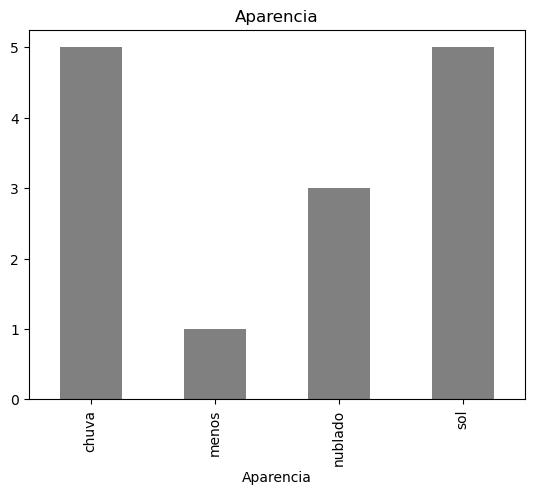

In [16]:
#Utilizando grafico de barras para melhor visualização de dados fora do domínio

aparencia.plot.bar(color="gray").set_title("Aparencia")

In [18]:
#Vento

vento = dataset.groupby(["Vento"]).size()
vento

#Conclusão: Não há valores fora do domínio

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

Text(0.5, 1.0, 'Vento')

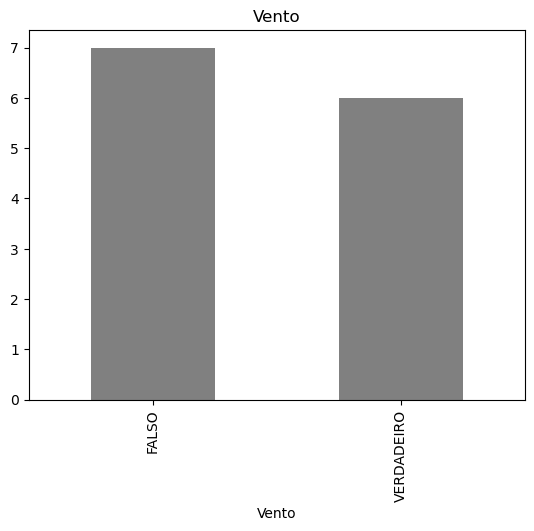

In [20]:
#Utilizando grafico de barras para melhor visualização de dados fora do domínio

vento.plot.bar(color="gray").set_title("Vento")

In [22]:
#Jogar

jogar = dataset.groupby(["Jogar"]).size()
jogar

#Conclusão: Não há valores fora do domínio

Jogar
nao    5
sim    9
dtype: int64

<font size="4">Explorando dados numéricos</font>

In [25]:
#Temperatura

temperatura = dataset["Temperatura"].describe()
temperatura

#Conclusão: Há outlier

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

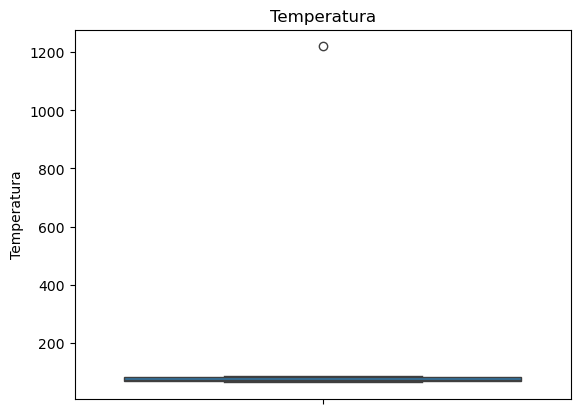

In [27]:
#Utilizando boxplot para melhor visualização do outlier

srn.boxplot(dataset["Temperatura"]).set_title("Temperatura")

In [29]:
#Umidade

umidade = dataset["Umidade"].describe()
umidade

#Conclusão: Há outlier

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

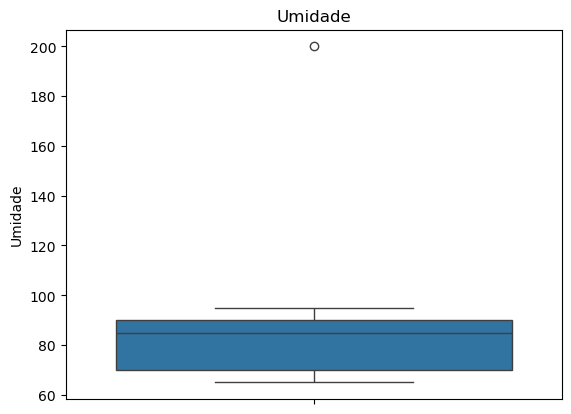

In [31]:
#Utilizando boxplot para melhor visualização do outlier

srn.boxplot(dataset["Umidade"]).set_title("Umidade")

<font size="4">Tratamento de Dados</font>

In [34]:
#DADOS A SEREM TRATADOS

#Valores NaN: Umidade e Vento
#Valores fora do domínio: Aparencia
#Outliers: Temperatura e Umidade

<font size="4">Vento - Substituir valor NaN com moda</font>

In [37]:
#Verificando moda

ventomoda = sts.mode(dataset["Vento"])
ventomoda

'FALSO'

In [39]:
#Substituindo valor NaN por moda

dataset.fillna({"Vento":ventomoda}, inplace = True)

In [41]:
#Verificando se NaN foi substituído

dataset["Vento"].isnull().sum()

0

<font size="4">Umidade - Substituir NaN e Outlier pela mediana</font>

In [44]:
#Calculando mediana

umidademedian = sts.median(dataset["Umidade"])
umidademedian

85.5

In [46]:
#Substituindo NaN por mediana

dataset.fillna({"Umidade":umidademedian}, inplace = True)

In [48]:
#Verificando se NaN foi substituído

dataset["Umidade"].isnull().sum()

0

In [50]:
#Substituindo outliers com mediana

dataset.loc[(dataset["Umidade"] < 0) | (dataset["Umidade"] > 100), "Umidade"] = umidademedian

In [52]:
#Verificando se outliers foram substituídos

dataset.loc[(dataset["Umidade"] < 0) | (dataset["Umidade"] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


<font size="4">Temperatura - Substituir Outlier pela mediana</font>

In [55]:
#Calculando mediana

tempmedian = sts.median(dataset["Temperatura"])
tempmedian

73.5

In [61]:
#Substituindo outliers com mediana

dataset.loc[(dataset["Temperatura"] < -130) | (dataset["Temperatura"] > 130), "Temperatura"] = tempmedian

In [63]:
#Verificando se outliers foram substituídos

dataset.loc[(dataset["Temperatura"] < 0) | (dataset["Temperatura"] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


<font size="4">Aparencia - Substituir dados fora do domínio por moda</font>

In [66]:
#Verificando moda

apmoda = sts.mode(dataset["Aparencia"])
apmoda

'sol'

In [68]:
#Substitindo valor fora de domínio por moda

dataset.loc[dataset["Aparencia"].isin(["menos"]), "Aparencia"] = apmoda

In [70]:
#Verificando se há valor fora de domínio

dataset.groupby(["Aparencia"]).size()

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [72]:
#Revisão final da tabela inteira

dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim
